## DATA ANALYSIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.drop('Invoice ID', axis=1, inplace=True)

In [4]:
df.drop('Time', axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Payment                  1000 non-null   object 
 11  cogs                     1000 non-null   float64
 12  gross margin percentage  1000 non-null   float64
 13  gross income             1000 non-null   float64
 14  Rating                   

In [6]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Ewallet,604.17,4.761905,30.2085,5.3


## Top 5 produtos mais vendidos:

In [7]:
items_count = df.groupby('Product line').count()['Total']
total_income = df.groupby('Product line').sum()['Total']
sales_percent = items_count/df.shape[0] * 100

#DataFrame
relatorio_top5 = pd.DataFrame({'Produtos mais Vendidos': items_count,
                         'Valor total das Compras': total_income,
                         'Porcentagem de Vendas': sales_percent})

relatorio_top5.sort_values('Produtos mais Vendidos', ascending=False, inplace=True)

relatorio_top5['Valor total das Compras'] = relatorio_top5['Valor total das Compras'].map('${:,.3f}'.format)
relatorio_top5['Porcentagem de Vendas'] = relatorio_top5['Porcentagem de Vendas'].map('{:,.2f}%'.format)

relatorio_top5

,Produtos mais Vendidos,Valor total das Compras,Porcentagem de Vendas
Product line,,,
Fashion accessories,178,"$54,305.895",17.80%
Food and beverages,174,"$56,144.844",17.40%
Electronic accessories,170,"$54,337.532",17.00%
Sports and travel,166,"$55,122.826",16.60%
Home and lifestyle,160,"$53,861.913",16.00%
Health and beauty,152,"$49,193.739",15.20%


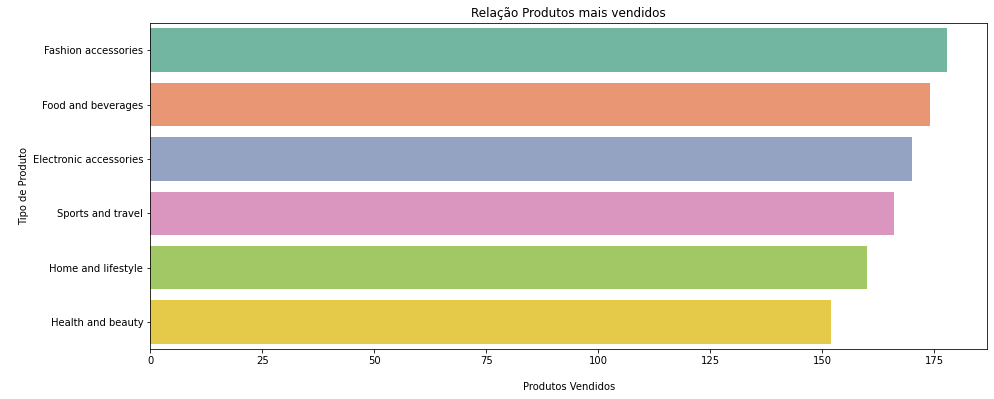

In [8]:
plt.figure(figsize=(15,6))
sns.barplot(y = relatorio_top5.index, x = relatorio_top5['Produtos mais Vendidos'], palette='Set2')
plt.xlabel('\nProdutos Vendidos')
plt.ylabel('\nTipo de Produto')
plt.title('Relação Produtos mais vendidos')
plt.show()

## Produto que gerou maior receita:

In [9]:
relatorio_lucro = pd.DataFrame({'Valor total das Compras': total_income,
                         'Produtos mais Vendidos': items_count,
                         'Porcentagem de Vendas': sales_percent})

relatorio_lucro['Valor total das Compras'] = relatorio_lucro['Valor total das Compras'].map('${:,.3f}'.format)
relatorio_lucro['Porcentagem de Vendas'] = relatorio_lucro['Porcentagem de Vendas'].map('{:,.2f}%'.format)

relatorio_lucro.sort_values('Valor total das Compras', ascending=False, inplace=True)

relatorio_lucro

,Valor total das Compras,Produtos mais Vendidos,Porcentagem de Vendas
Product line,,,
Food and beverages,"$56,144.844",174,17.40%
Sports and travel,"$55,122.826",166,16.60%
Electronic accessories,"$54,337.532",170,17.00%
Fashion accessories,"$54,305.895",178,17.80%
Home and lifestyle,"$53,861.913",160,16.00%
Health and beauty,"$49,193.739",152,15.20%


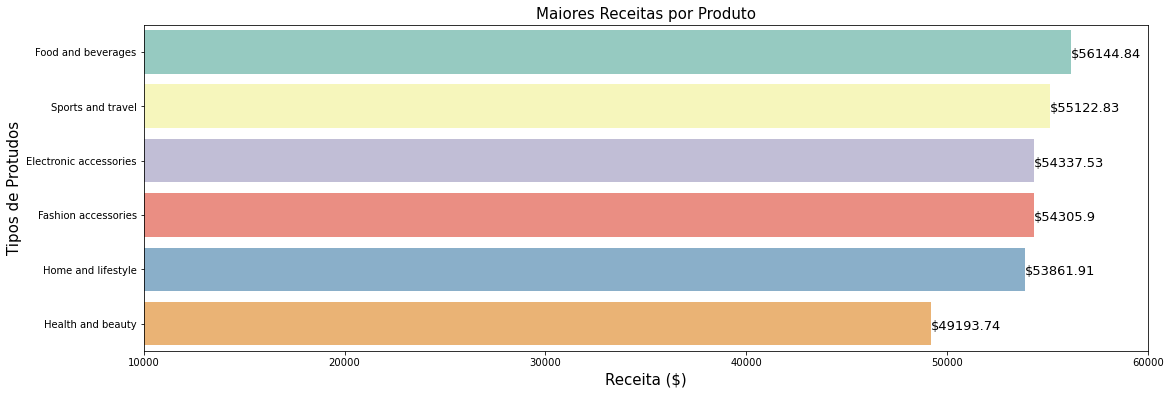

In [157]:
plt.figure(figsize=(18,6))
sns.barplot(x = total_income.sort_values(ascending=False), y = relatorio_lucro.index, 
            orient = "h", palette='Set3')

for i in range(len(relatorio_lucro.index)):
    plt.text(total_income.sort_values(ascending=False)[i],
            i +0.1,
            '$' + str(round(total_income.sort_values(ascending=False)[i], 2)), fontsize=13)
    
plt.title('Maiores Receitas por Produto', fontsize=15)
plt.xlabel('Receita ($)', fontsize=15)
plt.ylabel('Tipos de Protudos', fontsize=15)
plt.xlim(10000, 60000)          #Melhorar a visualização do gráfico
plt.show()

In [11]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Ewallet,604.17,4.761905,30.2085,5.3


## Analisando as Avaliações dos Clientes por Cidade

322.96674900000005

In [164]:
rating = df.groupby('City').median()['Rating']
profit_per_city = df.groupby('City').sum()['Total']
total_ratings = df.groupby('City').sum()['Rating']


city = pd.DataFrame({'Lucro por Cidade': profit_per_city,
                   'Média de Avaliações por Cidade': rating,
                    'Total de Avaliações': total_ratings})


city.sort_values('Lucro por Cidade', ascending=False, inplace=True)


city['Lucro por Cidade'] = city['Lucro por Cidade'].map('${:,.2f}'.format)

city

,Lucro por Cidade,Média de Avaliações por Cidade,Total de Avaliações
City,,,
Naypyitaw,"$110,568.71",7.1,2319.9
Yangon,"$106,200.37",7.1,2389.2
Mandalay,"$106,197.67",6.7,2263.6


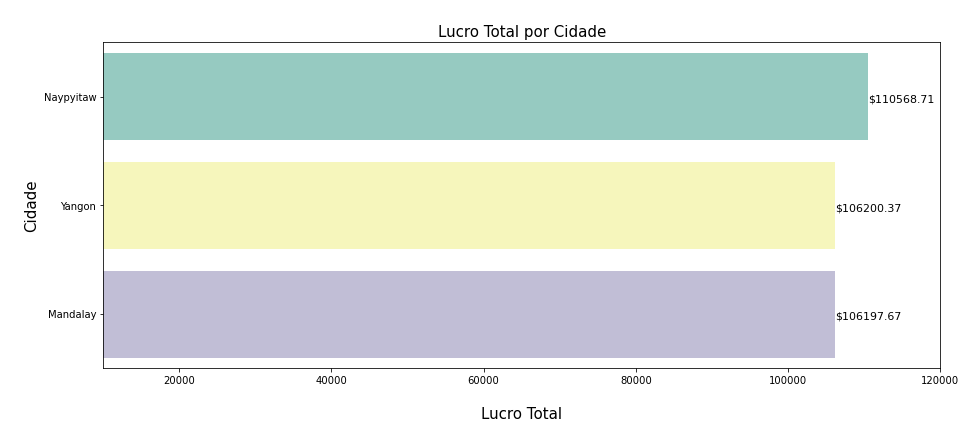

In [145]:
from matplotlib import cm

profit = profit_per_city.sort_values(ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x = profit, y = city.index, palette=cm.Set3(np.arange(100)), orient="h")

for i in range(len(profit_per_city.index)):
    plt.text(profit[i],i + 0.05,
            '$' + str(round(profit[i], 2)), fontsize=11)
    
plt.title('\nLucro Total por Cidade', fontsize=15)
plt.xlabel('\nLucro Total', fontsize=15)
plt.ylabel('\nCidade', fontsize=15)
plt.xlim(10e3, 12e4) # Melhorar a visualização
plt.show()

In [225]:
pct = [profit_per_city.mean()/ len(city.index)]
labels = [city.index[i] + ' ' + '-' + ' ' + f'{profit[i]:.3f}' + '$' for i in range(len(city.index))]
labels

['Naypyitaw - 110568.706$', 'Yangon - 106200.371$', 'Mandalay - 106197.672$']

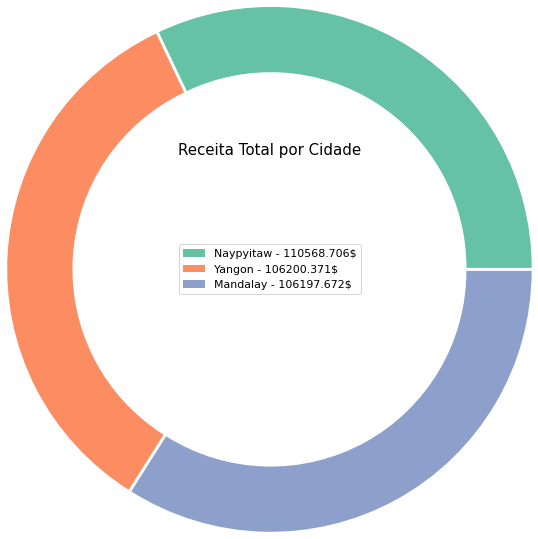

In [236]:
plt.pie(rating, explode = [0.02,0.02,0.02], radius=3, wedgeprops=dict(width=0.75),
        colors=cm.Set2(np.arange(100)))

plt.title('Receita Total por Cidade', fontsize=15)
plt.legend(labels=labels, loc = 'center', fontsize=11)
plt.show()